In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("Frames/Trajectory.txt", sep=" ")
aux=df.columns

auxdict={}
for i in range(len(aux)//2):
    auxdict[aux[1+2*i]]=aux[0+2*i][:-1]
    
traj=df.drop(aux[::2],axis=1).rename(columns=auxdict)
traj=traj.rename(index=traj["t"]).drop("t",axis=1)

traj1=traj.loc[2709:2709+1500]

In [2]:
path="./Frames/batch_20210629_135041.trial_008/color/"
frameName="batch_20210629_135041.trial_008.color_00"
frameNumber=722 #722
frameNumberMax=812

In [3]:
%matplotlib inline

img = plt.imread(path+frameName+str(frameNumber)+".png")

fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
ax.imshow(img[:,:,::-1])
ax.scatter([137,207], [102,95], c='#ff7f0e')
# fig.savefig('path/to/save/image/to.png')   # save the figure to file
# plt.close(fig)

# fig=plt.imshow(img)
# plt.scatter([137,215], [102,75], s=5)
# plt.scatter([215], [75], s=5)


fig.savefig('../img/Annotated.png', bbox_inches='tight')   # save the figure to file
plt.close(fig)   

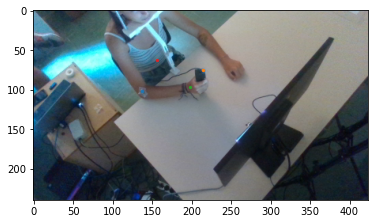

In [4]:
%matplotlib inline

img = plt.imread(path+frameName+str(frameNumber)+".png")
plt.imshow(img[:,:,::-1])
plt.scatter([137], [102], s=5)
plt.scatter([215], [75], s=5)
plt.scatter([215-17], [75+22], s=5)
plt.scatter([156], [62], s=5)

In [5]:
(-17,22)

(-17, 22)

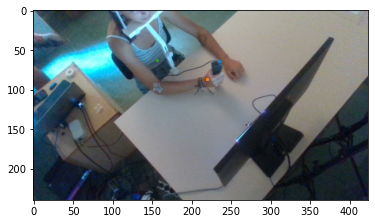

In [6]:
%matplotlib inline

img = plt.imread(path+frameName+str(frameNumberMax)+".png")
plt.imshow(img[:,:,::-1])
plt.scatter([236],[64],s=5)
plt.scatter([236-17],[64+22],s=5)
plt.scatter([156], [62], s=5)

In [7]:
pin=[traj1["x"].iloc[0],traj1["y"].iloc[0],1]
pfin=[215,75,1]
qin=[traj1["x2"].iloc[0],traj1["y2"].iloc[0],1]
qfin=[137,102,1]
rin=[traj1["x"].iloc[80],traj1["y"].iloc[80],1]
rfin=[236,64,1]

posin=np.array((pin,qin,rin)).T
posfin=np.array((pfin,qfin,rfin)).T
posin,posfin

M=np.matmul(posfin,np.linalg.inv(posin))

X=M[0][0]*traj1["x"]+M[0][1]*traj1["y"]+M[0][2]
Y=M[1][0]*traj1["x"]+M[1][1]*traj1["y"]+M[1][2]

traj2=traj1.drop(["x","y"],axis=1)
traj2["x"]=X
traj2["y"]=Y

X=M[0][0]*traj1["x2"]+M[0][1]*traj1["y2"]+M[0][2]
Y=M[1][0]*traj1["x2"]+M[1][1]*traj1["y2"]+M[1][2]

traj2=traj2.drop(["x2","y2"],axis=1)
traj2["x2"]=X
traj2["y2"]=Y

<IPython.core.display.Javascript object>


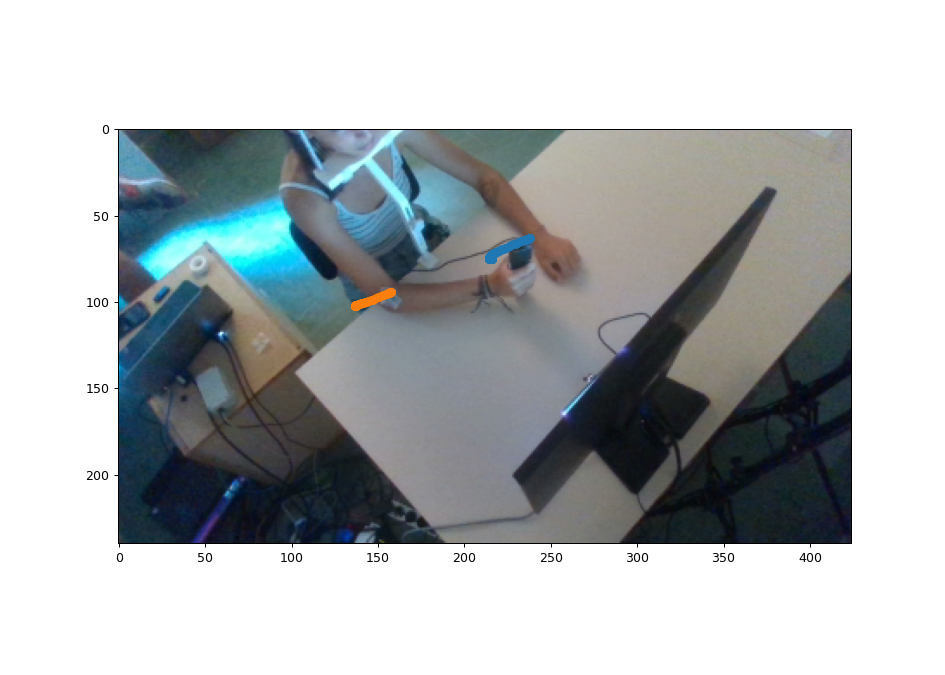

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook

plt.ion()
class DynamicUpdate():
    #Suppose we know the x range
    min_x = 0
    max_x = 10

    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[], 'o')
        self.figure.set_size_inches(10.5, 7.5)
        #Autoscale on unknown axis and known lims on the other
#         self.ax.set_autoscaley_on(True)
#         self.ax.set_xlim(self.min_x, self.max_x)
        #Other stuff
        self.ax.grid()
        ...

    def on_running(self, img, traj):
        #Update data (with the new _and_ the old points)
#         self.lines.set_xdata(xdata)
#         self.lines.set_ydata(ydata)
#         self.lines=plt.plot(xdata,ydata)
        self.figure.clf()
        self.lines = plt.imshow(img)
        self.lines = plt.scatter(traj["x"], traj["y"])
        self.lines = plt.scatter(traj["x2"], traj["y2"])
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

    #Example
    def __call__(self, path, frameName, frameNumber, frameNumberMax, traj, framerate):
        self.on_launch()
        for j in np.arange(1,72):
            img = plt.imread(path+frameName+str(frameNumber+j-1)+".png")
            self.on_running(img[:,:,::-1],traj[:j])
#             time.sleep(framerate)
        return True

d = DynamicUpdate()
data=d(path="./Frames/batch_20210629_135041.trial_008/color/",
        frameName="batch_20210629_135041.trial_008.color_00",
        frameNumber=740,
        frameNumberMax=812,
        traj=traj2,
        framerate=.016)
